In [1]:
# This is copy Kaggle code "Titanic_survivors" 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import graphviz
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file I/O

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.patk.join(dirname, filename))

In [3]:
# Roadmap
#Importing Dataset
#Handling Missing Values
#Data Visualization
#Handling Categorical Values
#Machine Learning
#Logistic Regression
#Decision Tree Classifier
#K Neighbors Classifier
#Support Vector Classifier
#Final Model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Dataset
train = pd.read_csv("/content/drive/MyDrive/Data-Sci/titanic-kaggle/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Data-Sci/titanic-kaggle/test.csv")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# preview data พบว่ามี columns ไม่เหมือนกัน
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape

(891, 12)

In [9]:
train.isnull().sum() 
# มีค่าว่างที่ช่องอายุมากกว่า 177 ข้อมูล
# Gap analysis --> missing values , Min , Max

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

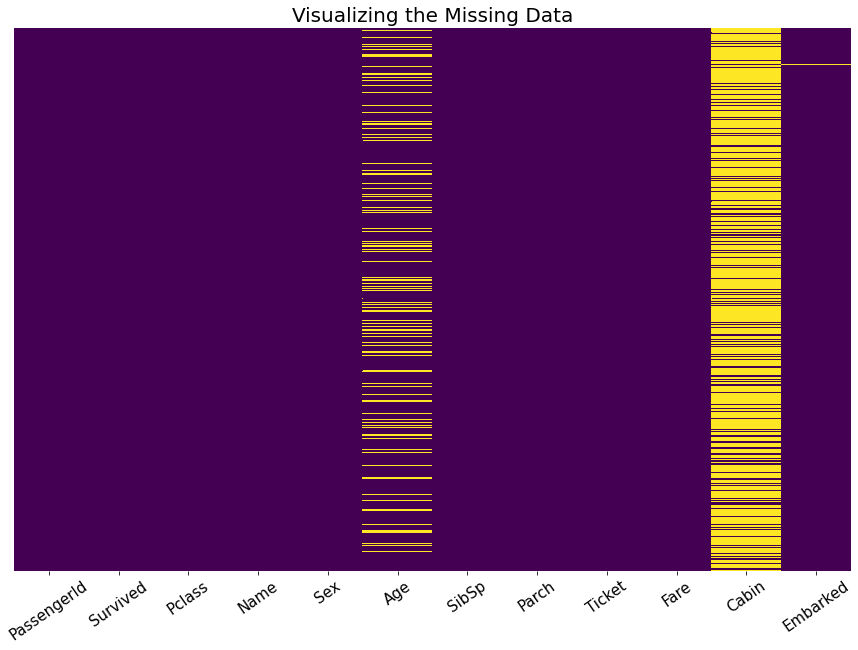

In [10]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize = (15, 10))
sns.heatmap(train.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

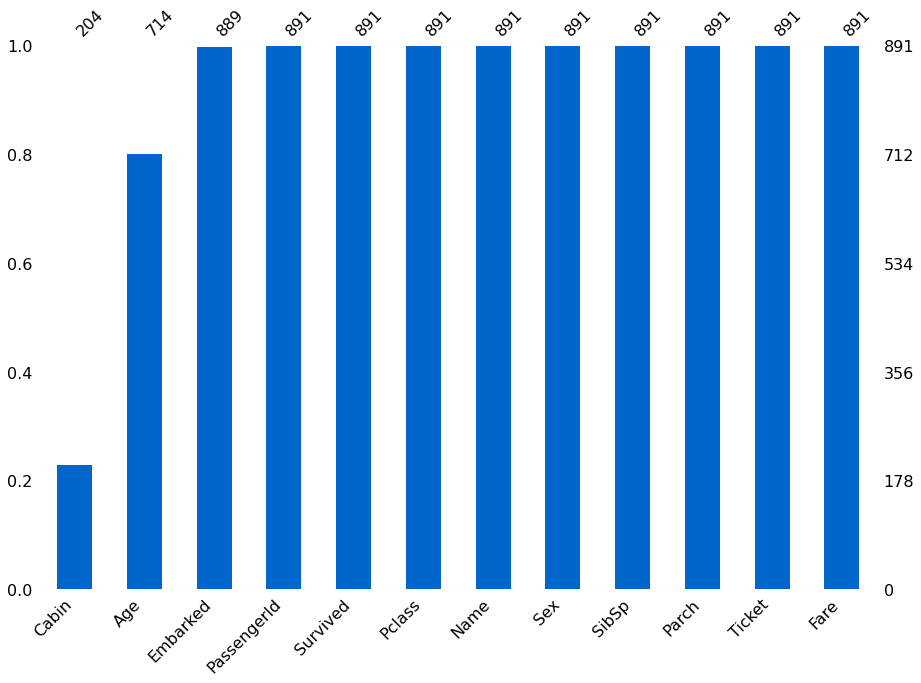

In [11]:
msno.bar(train, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

In [12]:
print("Missing Data in the Cabin column =", (train['Cabin'].isna().sum() / len(train['Cabin']) * 100), "%")

Missing Data in the Cabin column = 77.10437710437711 %


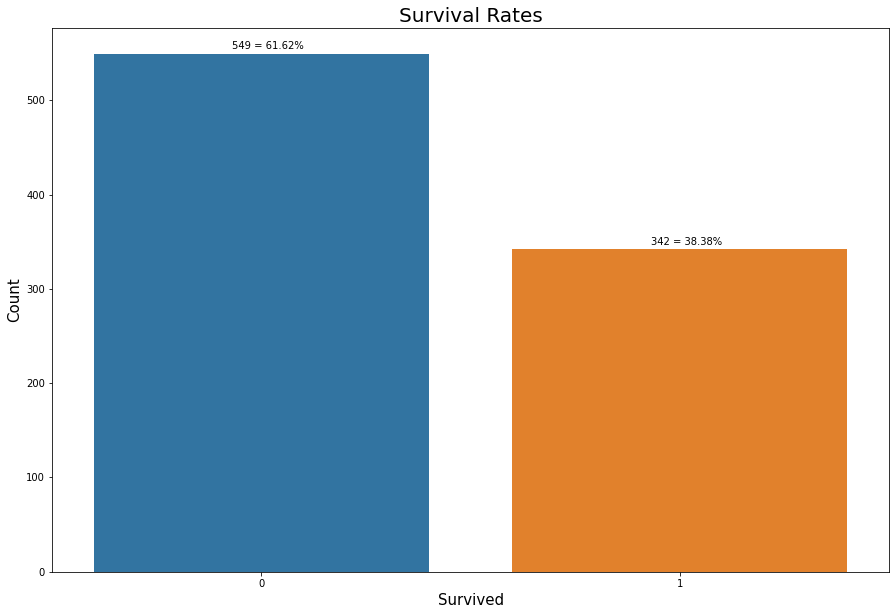

In [13]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', data = train)
plt.title('Survival Rates', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(train['Survived'])) * 100), (p.get_x() + 0.33, p.get_height() + 5))
plt.show()

# Based on data in the Survived column, we observe that only 342 passengers managed to survived (38.38%)

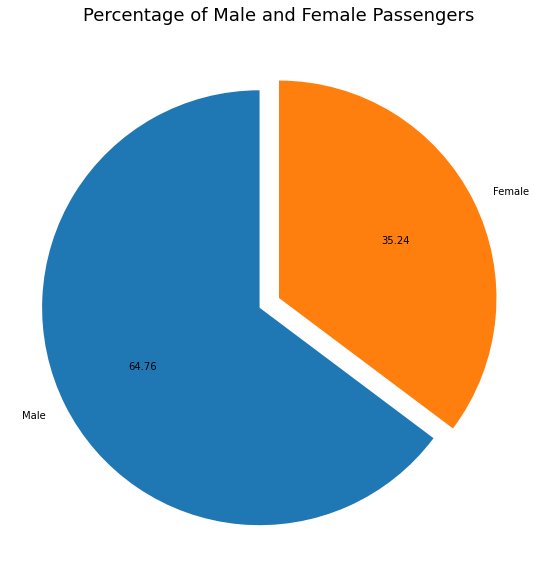

In [14]:

plt.figure(figsize = (15, 10))
plt.pie([(train.Sex == 'male').sum(), (train.Sex == 'female').sum()], labels = ["Male", "Female"], autopct = "%.2f", startangle = 90, explode = (0.1, 0.0))
plt.title('Percentage of Male and Female Passengers', fontsize = 18)
plt.show()

# Majority of the passengers aboard the Titanic were Male (64.76 %)
# Let's us now take a look at the Survival Rated for Male and Female passengers

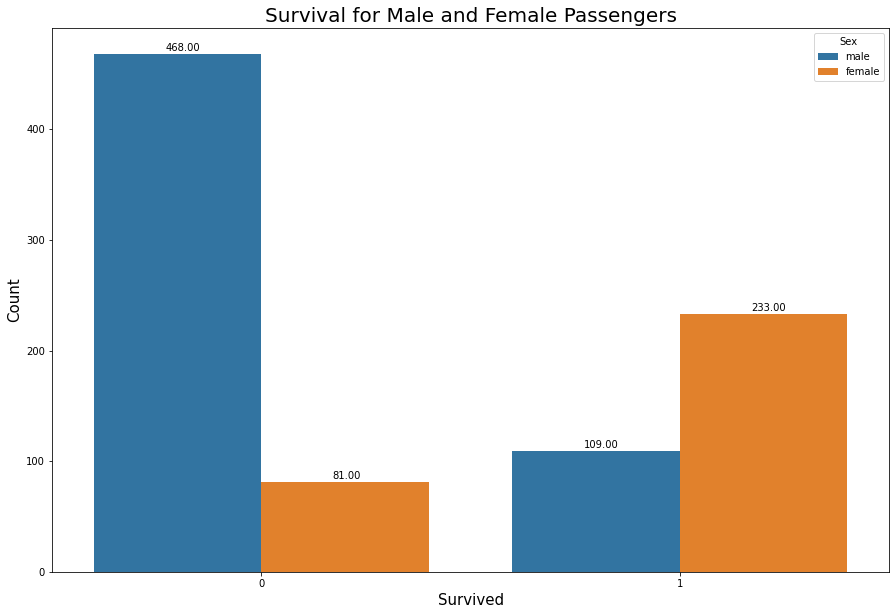

In [15]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = train)
plt.title('Survival for Male and Female Passengers', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()


# Observations
# - Most of the Male passengers have not survived.
# - Majority of the Female passengers have survived.

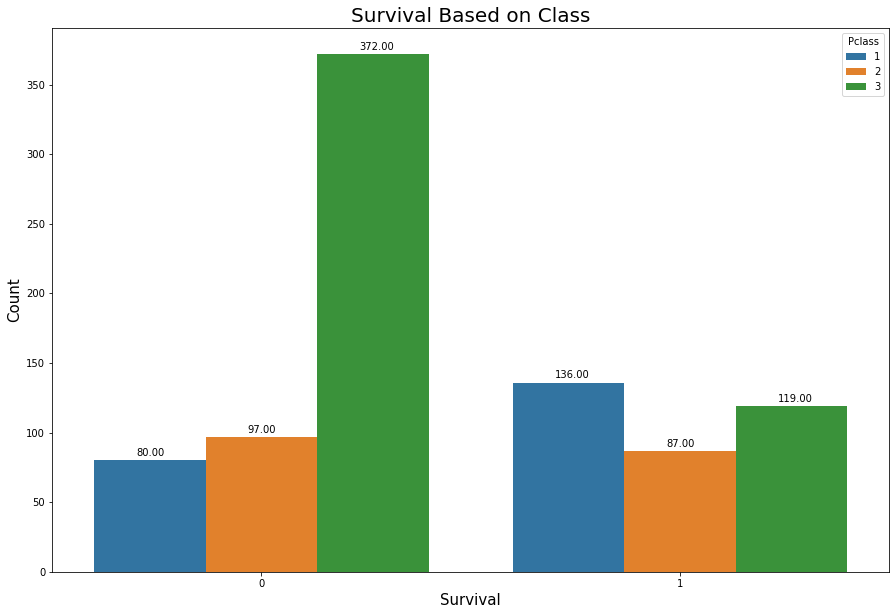

In [16]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
plt.title('Survival Based on Class', fontsize = 20)
plt.xlabel('Survival', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 3))
plt.show()

#We notice that Pclass of the passenger does affect their survival odds.
#Passengers in the 3rd class have a much higher mortality rate as compared to the other two classes.
#The 1st class has a higher number of passengers that survived, probably because they were richer.

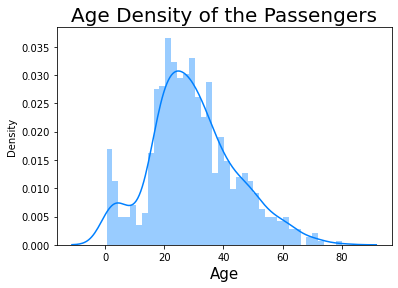

In [17]:
sns.distplot(train['Age'].dropna(), color = (0, 0.5, 1), bins = 40, kde = True)
plt.title('Age Density of the Passengers', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.show()

# Majority of the passengers on the Titanic were between 20 to 40 years of age

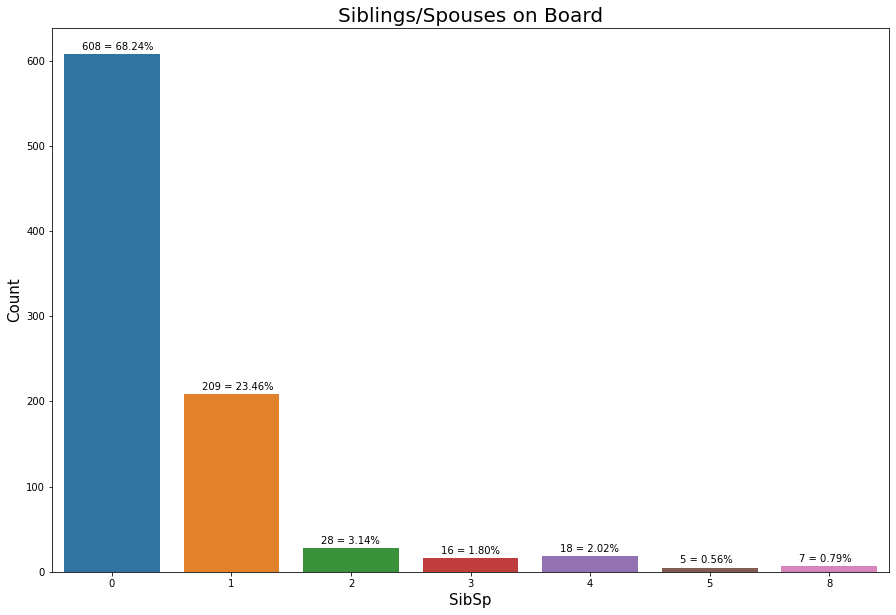

In [18]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'SibSp', data = train)
plt.title('Siblings/Spouses on Board', fontsize = 20)
plt.xlabel('SibSp', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(train['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

# SibSp indicates the numbers of Siblings or Spouses on board.
# From the countplot we see that most of the passengers were travelling alone

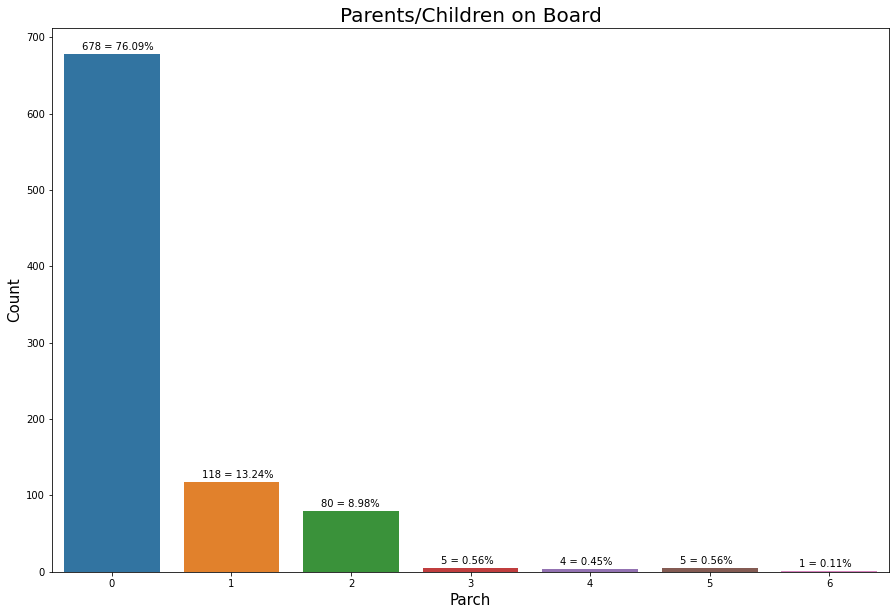

In [19]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Parch', data = train)
plt.title('Parents/Children on Board', fontsize = 20)
plt.xlabel('Parch', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(train['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

#Parch indicates the number of Parents or Children aboard the ship
#Just like in the case of SibSp we can observe that most of the people are travelling on their own.

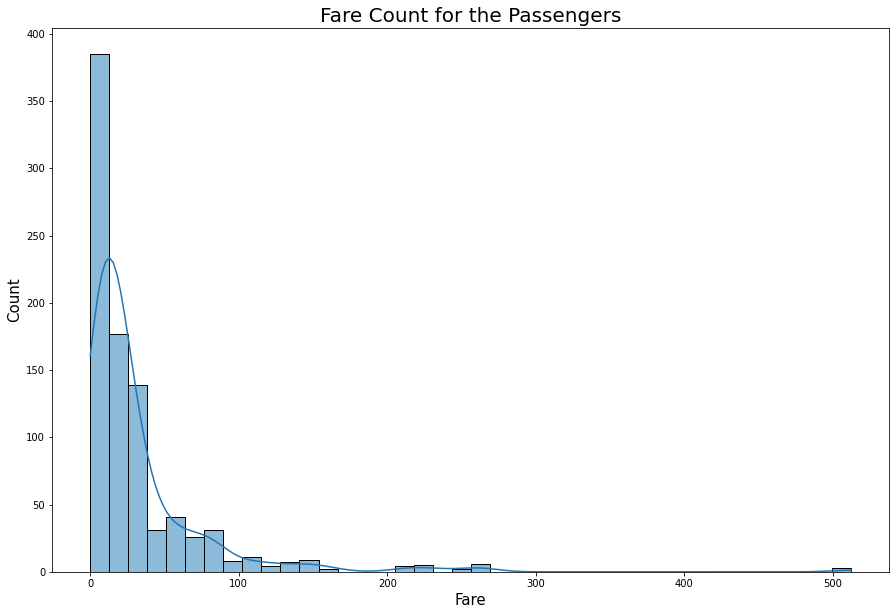

In [20]:
plt.figure(figsize = (15, 10))
sns.histplot(train['Fare'], bins = 40, kde = True)
plt.title('Fare Count for the Passengers', fontsize = 20)
plt.xlabel('Fare', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

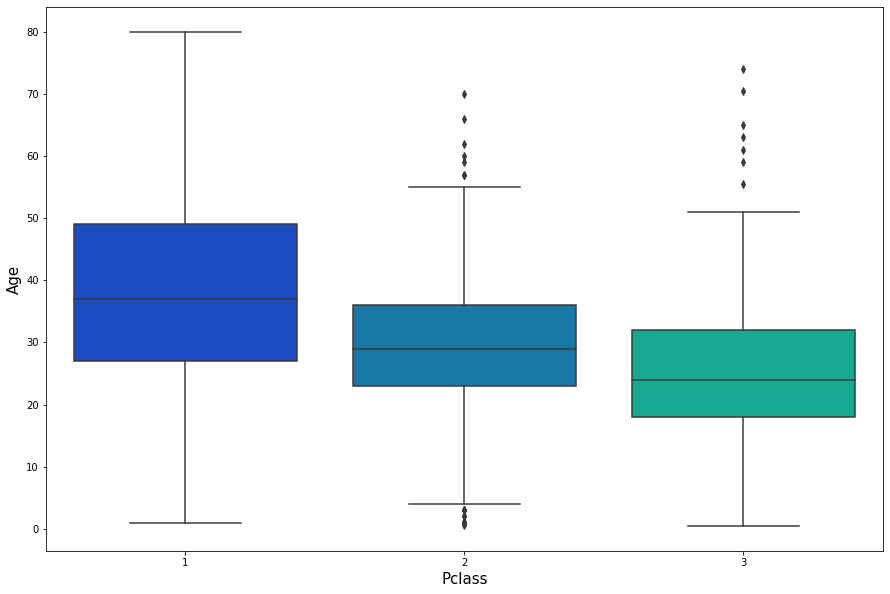

In [21]:
plt.figure(figsize = (15, 10))
bp = sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')
plt.xlabel('Pclass', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

#Looking at the median age of the passengers based on their class.
#The median age of the passengers in the 1st class is the highest.
#The median age of the passengers in the 3rd class is the lowest.
#Let us fill in the missing values in the Age column based on the median age of the Pclass.

In [22]:
def transform_columns(column):
    Age = column[0]
    Pclass = column[1]
    
    if(pd.isna(Age)):
       if(Pclass == 1):
            return 38
       elif(Pclass == 2):
            return 29   
       else:
            return 23  
    else:
       return Age

train['Age'] = train[['Age', 'Pclass']].apply(transform_columns, axis = 1)
print(train)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [23]:
# Feature Engineering
#Lets create a new feature IsAlone that tells us if the passenger is travelling solo or with a family.
train['IsAlone'] = train['SibSp'] + train['Parch']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


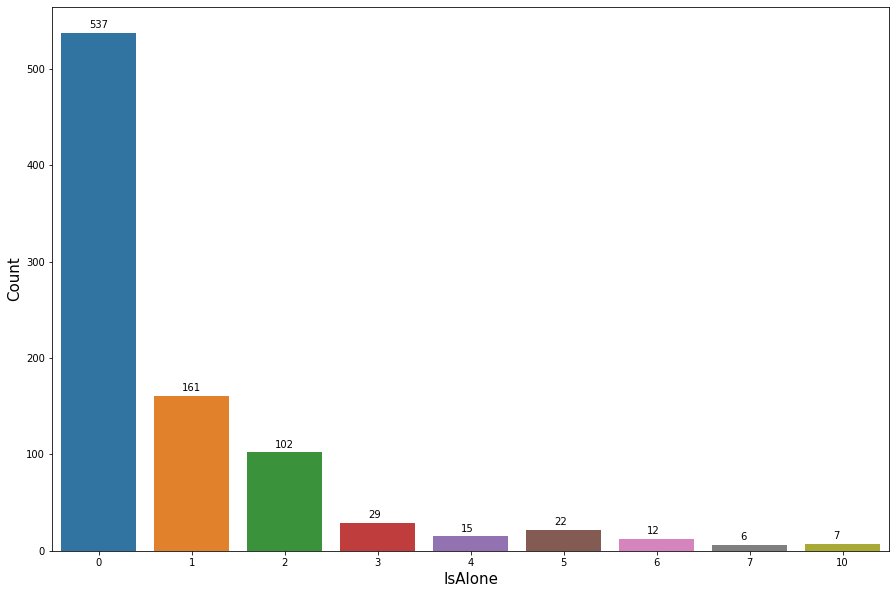

In [24]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'IsAlone', data = train)
plt.xlabel('IsAlone', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 5))
plt.show()

#As we can observe from the IsAlone feature most passengers are travelling by themselves, without any family

In [25]:
def convert_IsAlone(df):
    
    bins = [None] * len(df)

    for i in range(len(df)):
        if(df.IsAlone[i] in [0]):
            bins[i] = 'Alone'
        if(df.IsAlone[i] in [1, 2, 3, 4, 5, 6, 7, 10]):
            bins[i] = 'Not Alone'

    df['IsAlone'] = bins
    
convert_IsAlone(train)
train



#We created 2 groups for the IsAlone feature.

#The first group is named Alone and contains passengers travelling alone.
#The second group Not Alone is for passengers having one or more family member.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,Not Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


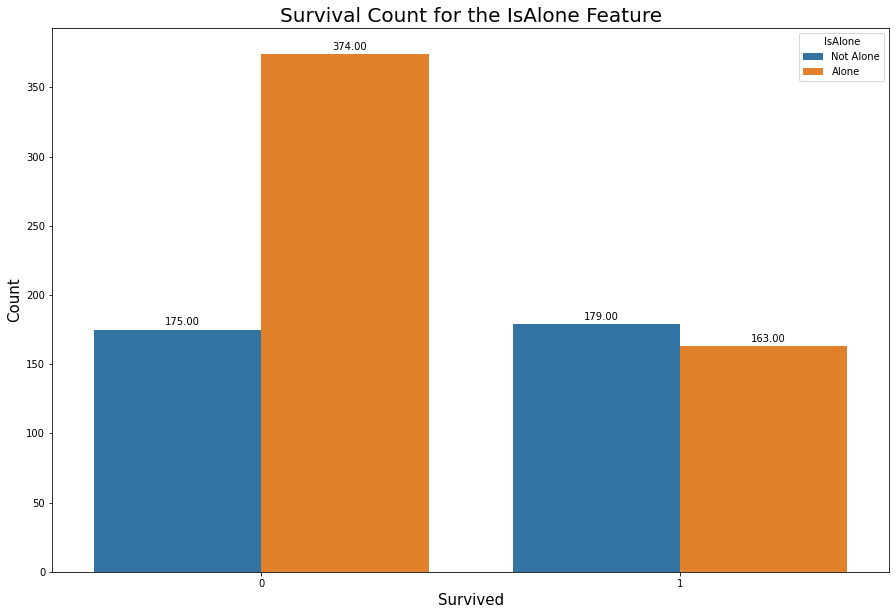

In [26]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'IsAlone', data = train)
plt.title('Survival Count for the IsAlone Feature', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()

#Passengers that travelled alone have a higher mortality than passengers that travelled with family.
#The survival chances for passengers tha travelled alone and those that travelled with family is almost the same.

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,Not Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


In [28]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
train

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,male,22.0,7.2500,Not Alone
1,1,1,female,38.0,71.2833,Not Alone
2,1,3,female,26.0,7.9250,Alone
3,1,1,female,35.0,53.1000,Not Alone
4,0,3,male,35.0,8.0500,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,Alone
887,1,1,female,19.0,30.0000,Alone
888,0,3,female,23.0,23.4500,Not Alone
889,1,1,male,26.0,30.0000,Alone


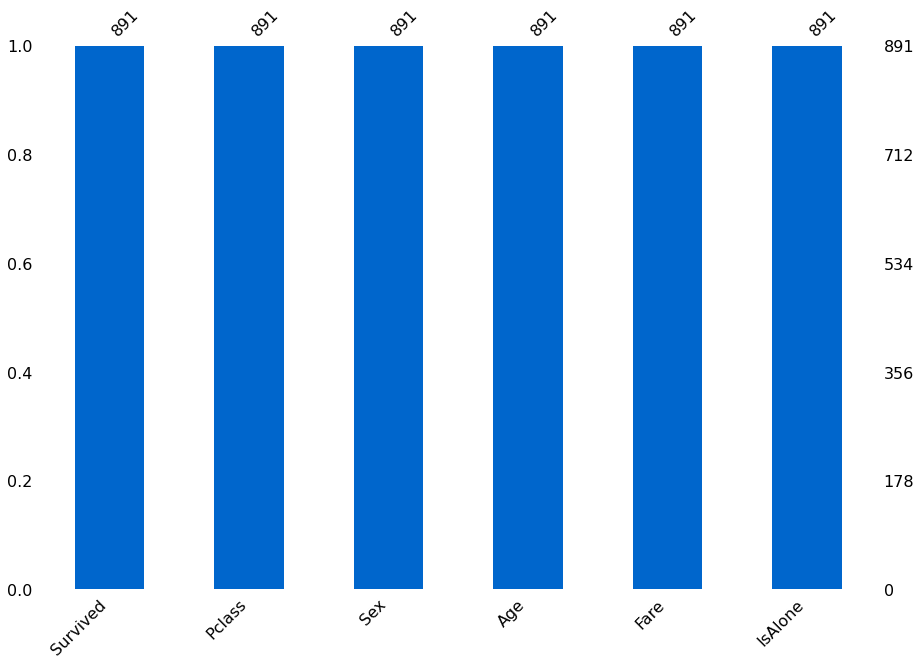

In [29]:
msno.bar(train, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

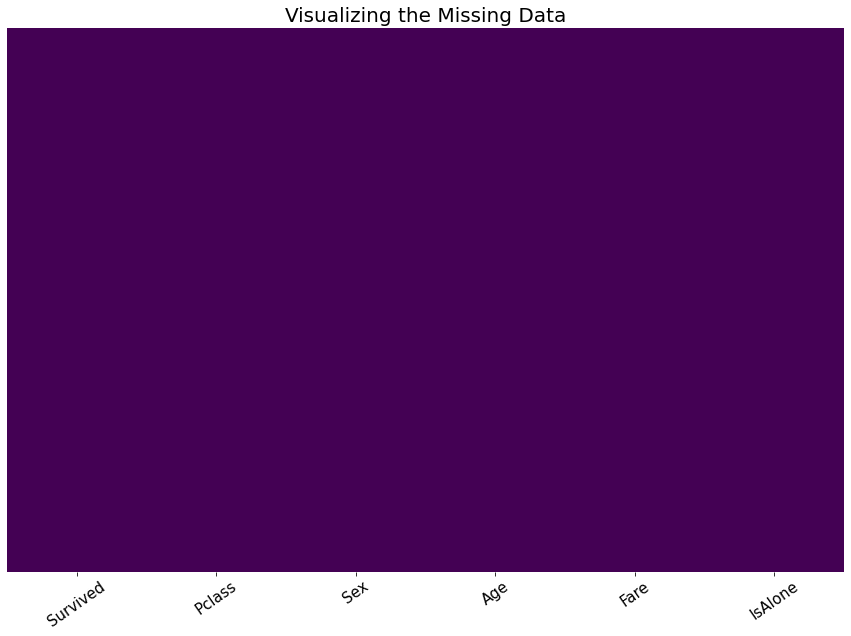

In [30]:
plt.figure(figsize = (15, 10))
sns.heatmap(train.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

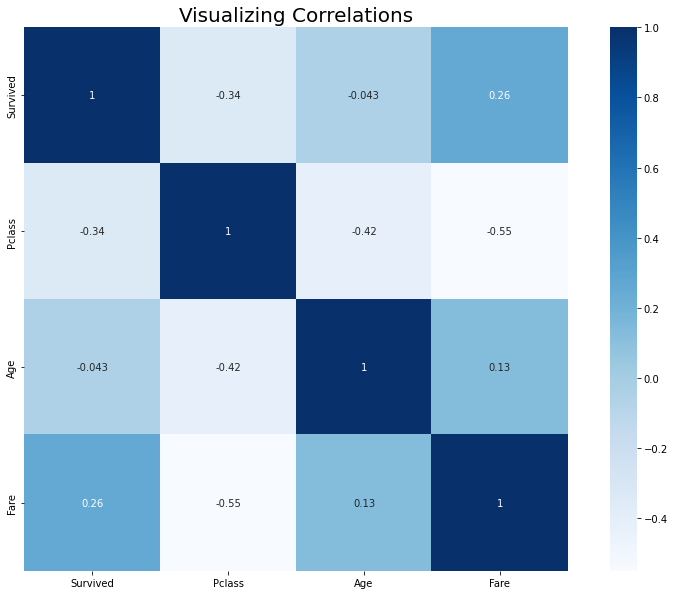

In [31]:
# Check correlation
plt.figure(figsize = (15, 10))
sns.heatmap(train.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

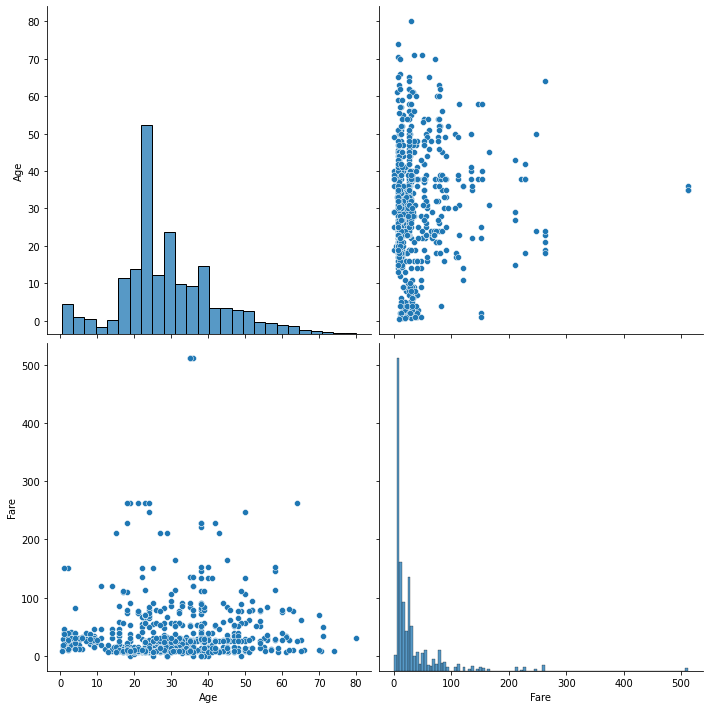

In [32]:
numeric_features = ['Age', 'Fare']
sns.pairplot(train[numeric_features], size = 5)
plt.show()

In [33]:
#Encoding the Categorical Features
#The categorical data can be encoded using Label Encoder. 
#It encodes labels with a value between 0 and n_classes - 1 where n is the number of distinct labels. 
#If a label repeats it assigns the same value as assigned earlier. 
#The categorical values can be converted into numeric values.

label_encoder = LabelEncoder()

def label_encoder_converter(df):
    
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['IsAlone'] = label_encoder.fit_transform(df['IsAlone'])
    
label_encoder_converter(train)

In [34]:
#Scaling the Data
#StandardScaler standardizes a feature by subtracting the mean and then scaling it to unit variance

scaler = StandardScaler()
train[numeric_features] = scaler.fit_transform(train[numeric_features])
train

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,-0.521504,-0.502445,1
1,1,1,0,0.679523,0.786845,1
2,1,3,0,-0.221247,-0.488854,0
3,1,1,0,0.454331,0.420730,1
4,0,3,1,0.454331,-0.486337,0
...,...,...,...,...,...,...
886,0,2,1,-0.146183,-0.386671,0
887,1,1,0,-0.746697,-0.044381,0
888,0,3,0,-0.446440,-0.176263,1
889,1,1,1,-0.221247,-0.044381,0


In [35]:
X = train.iloc[:, 1:]
y = train['Survived']
print(X, "\n\n\n", y)

     Pclass  Sex       Age      Fare  IsAlone
0         3    1 -0.521504 -0.502445        1
1         1    0  0.679523  0.786845        1
2         3    0 -0.221247 -0.488854        0
3         1    0  0.454331  0.420730        1
4         3    1  0.454331 -0.486337        0
..      ...  ...       ...       ...      ...
886       2    1 -0.146183 -0.386671        0
887       1    0 -0.746697 -0.044381        0
888       3    0 -0.446440 -0.176263        1
889       1    1 -0.221247 -0.044381        0
890       3    1  0.229138 -0.492378        0

[891 rows x 5 columns] 


 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [36]:
train

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,-0.521504,-0.502445,1
1,1,1,0,0.679523,0.786845,1
2,1,3,0,-0.221247,-0.488854,0
3,1,1,0,0.454331,0.420730,1
4,0,3,1,0.454331,-0.486337,0
...,...,...,...,...,...,...
886,0,2,1,-0.146183,-0.386671,0
887,1,1,0,-0.746697,-0.044381,0
888,0,3,0,-0.446440,-0.176263,1
889,1,1,1,-0.221247,-0.044381,0


In [37]:
#Splitting the Data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

What is a Confusion Matrix ?
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. Let us understand some of the terms associated with a confusion matrix:

True Negative: You predicted a Negative and its True.
True Positive: You predicted a Positive and its True.
False Positive: You predicted a Positive but its False.
False Negative: You predicted a Negative but its False.

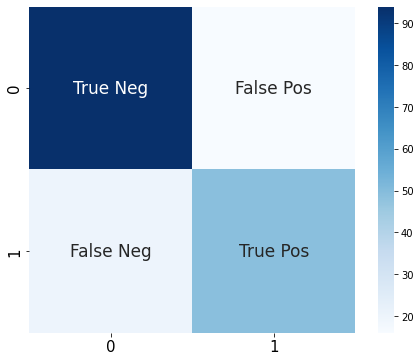

In [38]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, (LogisticRegression().fit(X_train, y_train)).predict(X_test)), 
            annot = labels, fmt = '', 
            cmap = 'Blues', 
            annot_kws={'size': 17}, 
            square = True)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

In [39]:
def visualize_confmat(cm_for_mod):
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_for_mod, annot = True, cmap = 'Blues', annot_kws={'size': 15}, square = True)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()

Logistic Regression
Logistic regression is a supervised learning algorithm used to predict the probability of a target variable. It is used for classification, in this case to predict whether a passenger survived or not

The accuracy for logistic regression is: 79.88826815642457 %





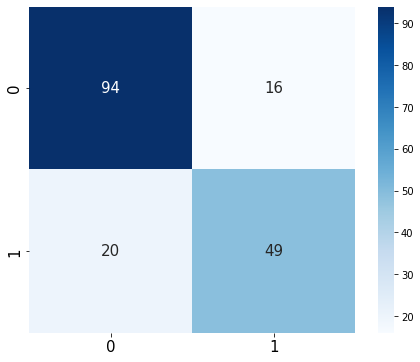

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for logistic regression is:", acc_lr * 100, "%")
print("\n\n")
cm_lr = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_lr)

K-Nearest Neighbors
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

The accuracy for KNN is: 82.12290502793296 %





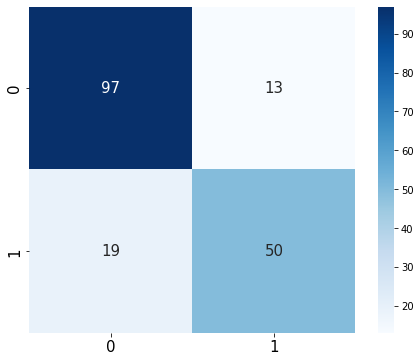

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
print("The accuracy for KNN is:", acc_knn * 100, "%")
print("\n\n")
cm_knn = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_knn)

Support Vector Classifier

It is used in classification problems to predict which class the target variable belongs to

The accuracy for the Support Vector Classifier is: 79.3296089385475 %





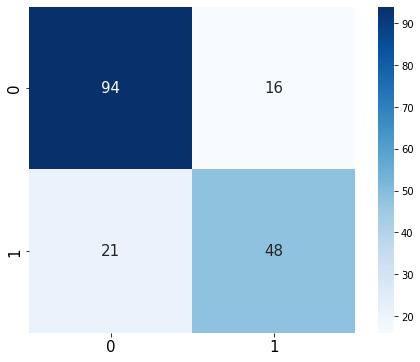

In [42]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print("The accuracy for the Support Vector Classifier is:", acc_svc * 100, "%")
print("\n\n")
cm_svc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_svc)

Decision Tree Classifier

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable.

The accuracy for the Decision Tree Classifier is: 79.3296089385475 %





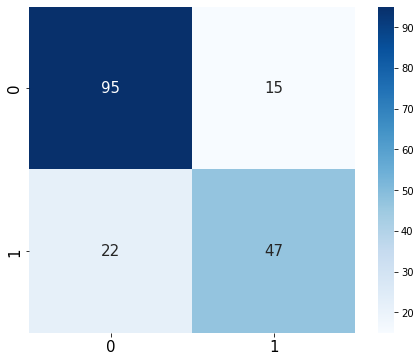

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print("The accuracy for the Decision Tree Classifier is:", acc_dtc * 100, "%")
print("\n\n")
cm_dtc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_dtc)

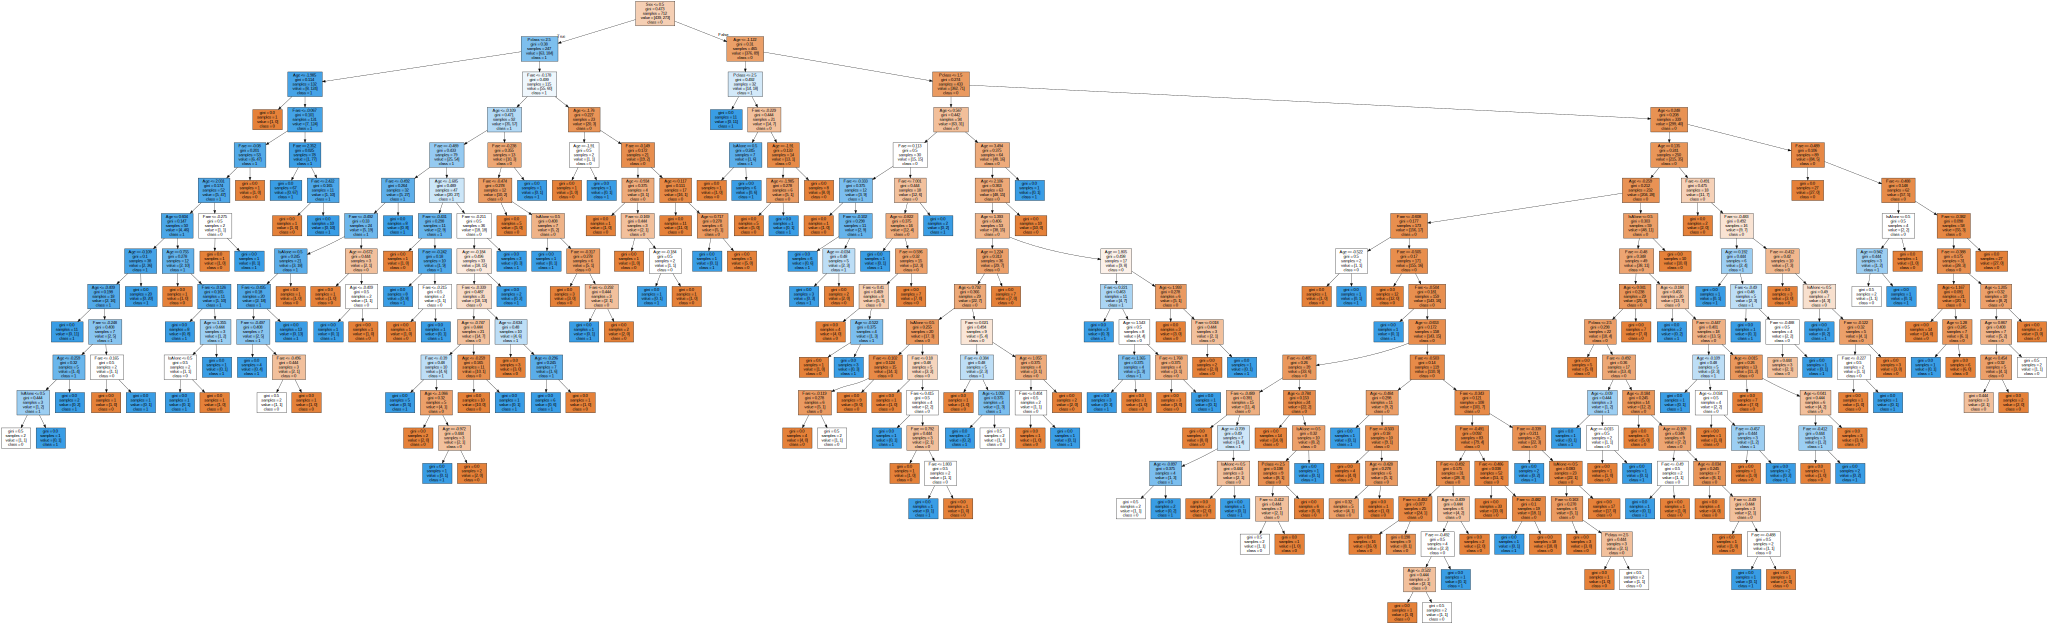

In [44]:
# Visualizing the Decision Tree Classifier

dot_data = tree.export_graphviz(dtc, out_file = None, feature_names = X.columns, class_names = ["0", "1"], filled = True)
graph = graphviz.Source(dot_data, format = "jpg")
display(graph)

Random Forest Classifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

The accuracy for the Random Forest Classifier is: 84.35754189944134 %





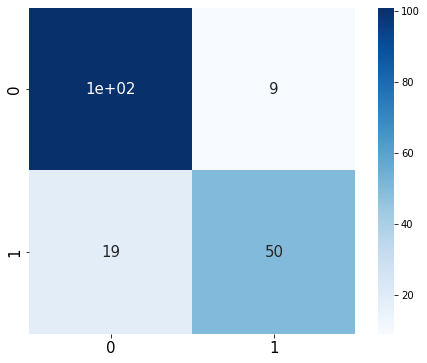

In [45]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = rf.score(X_test, y_test)
print("The accuracy for the Random Forest Classifier is:", acc_rf * 100, "%")
print("\n\n")
cm_rf = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_rf)

AdaBoost Classifier

It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

The accuracy for the Extra Trees Classifier is: 80.44692737430168 %





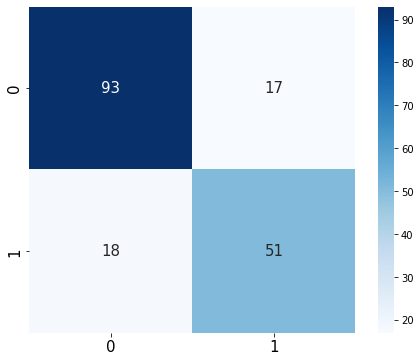

In [46]:
adc = AdaBoostClassifier()
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)
acc = adc.score(X_test, y_test)
acc_adc = adc.score(X_test, y_test)
print("The accuracy for the Extra Trees Classifier is:", acc_adc * 100, "%")
print("\n\n")
cm_adc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_adc)

Extra Trees Classifier

This is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

The accuracy for the Extra Trees Classifier is: 79.88826815642457 %





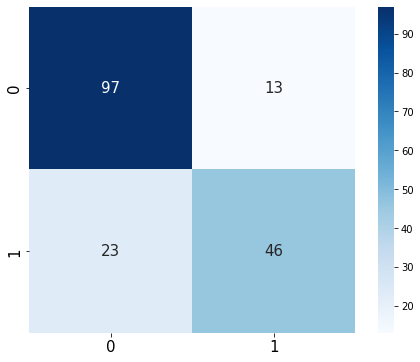

In [47]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print("The accuracy for the Extra Trees Classifier is:", acc_etc * 100, "%")
print("\n\n")
cm_etc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_etc)

Bagging Classifier

Bagging classifier is an ensemble technique that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction.

The accuracy for the Bagging Classifier is: 80.44692737430168 %





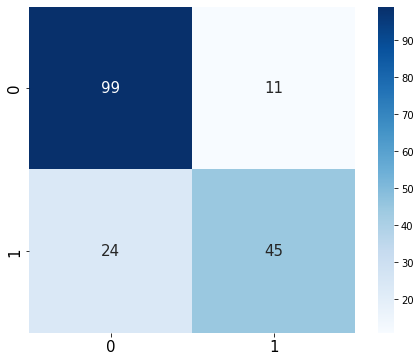

In [48]:
bgc = BaggingClassifier()
bgc.fit(X_train, y_train)
y_pred = bgc.predict(X_test)
acc_bgc = bgc.score(X_test, y_test)
print("The accuracy for the Bagging Classifier is:", acc_bgc * 100, "%")
print("\n\n")
cm_bgc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_bgc)

Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

The accuracy for the Gradient Boosting Classifier is: 82.12290502793296 %





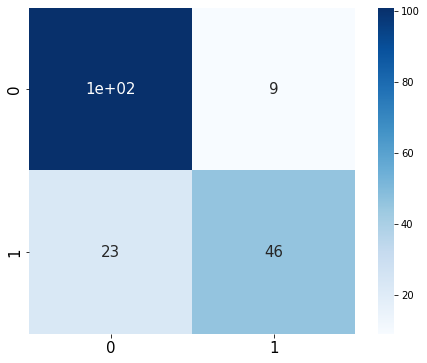

In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print("The accuracy for the Gradient Boosting Classifier is:", acc_gbc * 100, "%")
print("\n\n")
cm_gbc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_gbc)

XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process.

The accuracy for the XGBoost Classifier is: 83.79888268156425 %





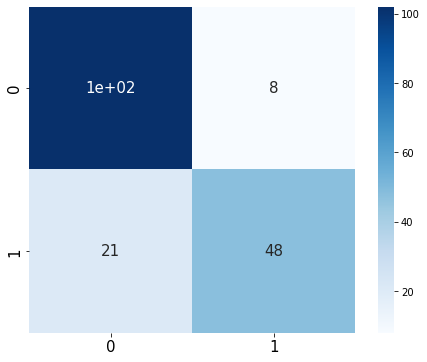

In [50]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print("The accuracy for the XGBoost Classifier is:", acc_xgbc * 100, "%")
print("\n\n")
cm_xgbc = confusion_matrix(y_test, y_pred)
visualize_confmat(cm_xgbc)

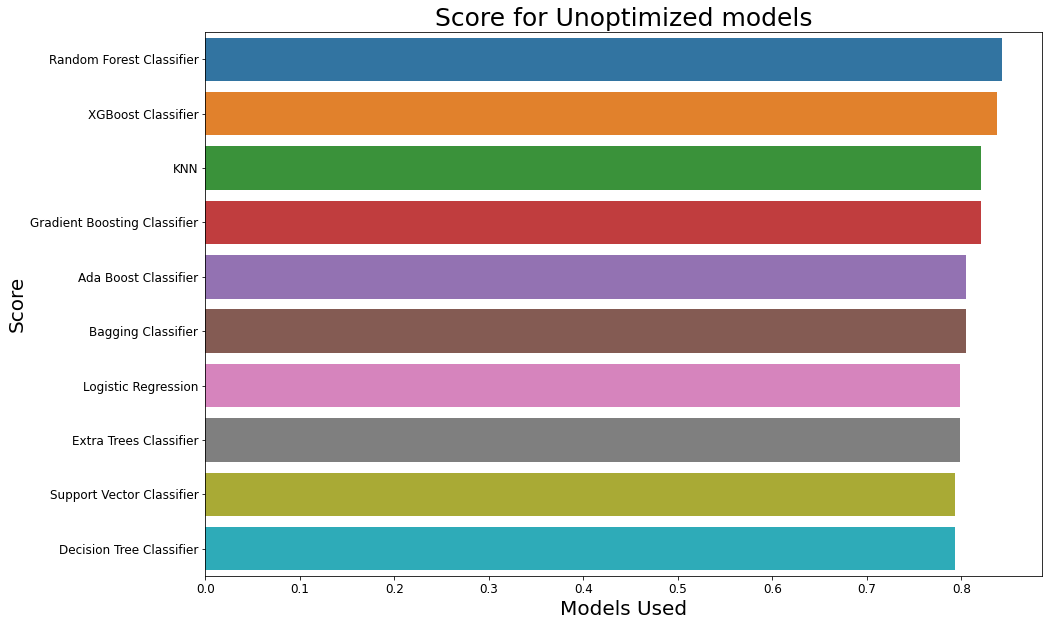

In [51]:
# Model Results

data = {'Logistic Regression': acc_lr, 'KNN': acc_knn,
        'Support Vector Classifier': acc_svc, 'Decision Tree Classifier': acc_dtc, 'Random Forest Classifier': acc_rf,
        'Ada Boost Classifier': acc_adc, 'Extra Trees Classifier': acc_etc,
        'Bagging Classifier': acc_bgc, 'Gradient Boosting Classifier': acc_gbc,
        'XGBoost Classifier': acc_xgbc}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Models Used", size = 20)
plt.xticks(size = 12)
plt.ylabel("Score", size = 20)
plt.yticks(size = 12)
plt.title("Score for Unoptimized models", size = 25)
plt.show()

In [52]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [53]:
# Creating the submissionFile

test_df = test
test_df['Age'] = test_df[['Age', 'Pclass']].apply(transform_columns, axis = 1)
test_df = test_df.drop(columns = ['Cabin'], axis = 1)
test_df = test_df.fillna(train['Fare'].mean())
test_df['IsAlone'] = test_df['SibSp'] + test_df['Parch']
convert_IsAlone(test_df)
test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 1, inplace = True)
label_encoder_converter(test_df)
print(test_df)

# หา columns Survive ในข้อมูล

     Pclass  Sex   Age      Fare  IsAlone
0         3    1  34.5    7.8292        0
1         3    0  47.0    7.0000        1
2         2    1  62.0    9.6875        0
3         3    1  27.0    8.6625        0
4         3    0  22.0   12.2875        1
..      ...  ...   ...       ...      ...
413       3    1  23.0    8.0500        0
414       1    0  39.0  108.9000        0
415       3    1  38.5    7.2500        0
416       3    1  23.0    8.0500        0
417       3    1  23.0   22.3583        1

[418 rows x 5 columns]


In [54]:
X = test_df.iloc[:, 0:]
print(X)

     Pclass  Sex   Age      Fare  IsAlone
0         3    1  34.5    7.8292        0
1         3    0  47.0    7.0000        1
2         2    1  62.0    9.6875        0
3         3    1  27.0    8.6625        0
4         3    0  22.0   12.2875        1
..      ...  ...   ...       ...      ...
413       3    1  23.0    8.0500        0
414       1    0  39.0  108.9000        0
415       3    1  38.5    7.2500        0
416       3    1  23.0    8.0500        0
417       3    1  23.0   22.3583        1

[418 rows x 5 columns]


In [56]:
X = test_df.iloc[:, 0:]
y_pred_xgbc = xgbc.predict(X)
final_pred = list(y_pred_xgbc)

# นำค่าที่ predict ได้ลงในตาราง submission
final_sub = pd.read_csv('/content/drive/MyDrive/Data-Sci/titanic-kaggle/test.csv')['PassengerId']
final_sub = pd.DataFrame(final_sub)
final_sub['Survived'] = final_pred
final_sub.to_csv('/content/drive/MyDrive/Data-Sci/titanic-kaggle/submission2.csv', index = False)
final_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
